# IBM HR Analytic Report

Description and Exploration:
This data set, from Kaggle, contains 35 data points on 1470 employees. The data points of interest in this report are monthly income, job satisfaction, education level, and performance rating. This report explores how these variables effect each other. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Summary Statistics

Number of employees: 1470
Average monthly income: 6502.931292517007  Range: 1009 - 19999 Median: 4919.0
Average job satisfaction 2.7285714285714286  Range: 1-4
Average performane rating 3.1537414965986397  Range: 1-4
Income Quartiles: 
 0.25    2911.0
0.50    4919.0
0.75    8379.0
Name: MonthlyIncome, dtype: float64
4919.0


Text(0, 0.5, 'Number of Employees')

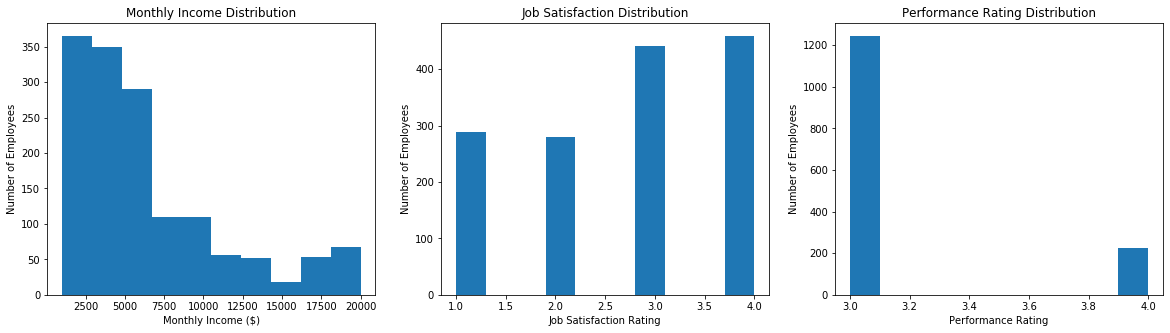

In [141]:
df = pd.read_csv('IBM.csv')
Number_of_employees = len(df.index)
print("Number of employees:", Number_of_employees)
income = np.mean(df['MonthlyIncome'])
minim = np.min(df['MonthlyIncome'])
maxim = np.max(df['MonthlyIncome'])
med = np.median(df['MonthlyIncome'])
print("Average monthly income:", income, " Range:", minim, "-", maxim, 'Median:', med)
JobSat = np.mean(df['JobSatisfaction'])
print("Average job satisfaction", JobSat, " Range: 1-4")
PerfRat = np.mean(df['PerformanceRating'])
print("Average performane rating", PerfRat, " Range: 1-4")
print("Income Quartiles: \n",
      df.MonthlyIncome.quantile([0.25,0.5,0.75]))

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(df['MonthlyIncome'])
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
plt.hist(df['JobSatisfaction'])
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 3)
plt.hist(df['PerformanceRating'])
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')

## Question 1: The Effect of Education Level on Monthly Income

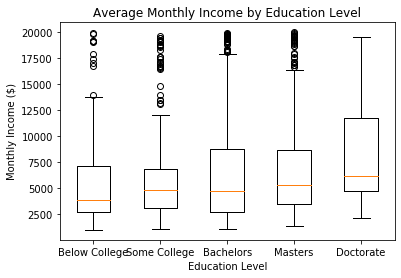

In [37]:
below_college = df.loc[lambda df: df['Education'] == 1, : ]
below_college = below_college['MonthlyIncome']
some_college = df.loc[lambda df: df['Education'] == 2, : ]
some_college = some_college['MonthlyIncome']
bachelors = df.loc[lambda df: df['Education'] == 3, : ]
bachelors = bachelors['MonthlyIncome']
masters = df.loc[lambda df: df['Education'] == 4, : ]
masters = masters['MonthlyIncome']
doctor = df.loc[lambda df: df['Education'] == 5, : ]
doctor = doctor['MonthlyIncome']
box_plot_data=[below_college, some_college, bachelors, masters, doctor]
plt.boxplot(box_plot_data, labels=['Below College','Some College','Bachelors','Masters', 'Doctorate'])
plt.title('Average Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income ($)')
plt.show()

This graph reveals that the more educated someone is, the more likely they are to make more money. However, just because one doesn't have the highest degree does not mean they are incapable of making as much money as someone who does. This is evidenced by the outliers in the first four boxplots which represent people making comparable wages to the highest paid employees with Philosophy Doctorates. 

## Question 2: The Effect of Monthly Income on Job Satisfaction

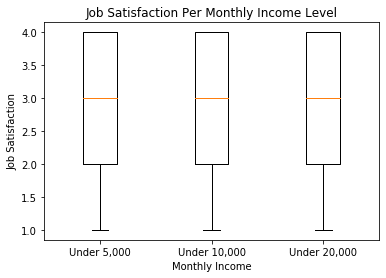

The average satisfaction for those making under 5,000 a month is 2.712950600801068 , under 10,000 is  2.765909090909091 , and under 20,000 is  2.711743772241993 . The difference between these means is negligible. Therefore, there is no significant different between the reported job satisfaction of different income levels. This means that, at least at IBM, one's income does not influence the satisfaction they receive from their work.


In [165]:
df = pd.read_csv('IBM.csv')
under5 = df.loc[lambda df: df['MonthlyIncome'] < 5000, : ]
under5 = under5['JobSatisfaction']
under10 = df.loc[lambda df: df['MonthlyIncome'] >= 5000, : ]
under10 = under10.loc[lambda under10: under10['MonthlyIncome'] < 10000, : ]
under10 = under10['JobSatisfaction']
under20 = df.loc[lambda df: df['MonthlyIncome'] >= 10000, : ]
under20 = under20.loc[lambda under20: under20['MonthlyIncome'] < 20000, : ]
under20 = under20['JobSatisfaction']
av_sat = [under5, under10, under20]
plt.boxplot(av_sat, labels=['Under 5,000','Under 10,000','Under 20,000'])
plt.title('Job Satisfaction Per Monthly Income Level')
plt.xlabel('Monthly Income')
plt.ylabel('Job Satisfaction')
plt.show()
print("The average satisfaction for those making under 5,000 a month is", np.mean(under5), ", under 10,000 is ", np.mean(under10), ", and under 20,000 is ", np.mean(under20), ". The difference between these means is negligible. Therefore, there is no significant different between the reported job satisfaction of different income levels. This means that, at least at IBM, one's income does not influence the satisfaction they receive from their work.")

## Question 3: The Effect of Monthly Income on Performance (Performance Based Compensation Differential)

Text(0, 0.5, 'Number of Employees')

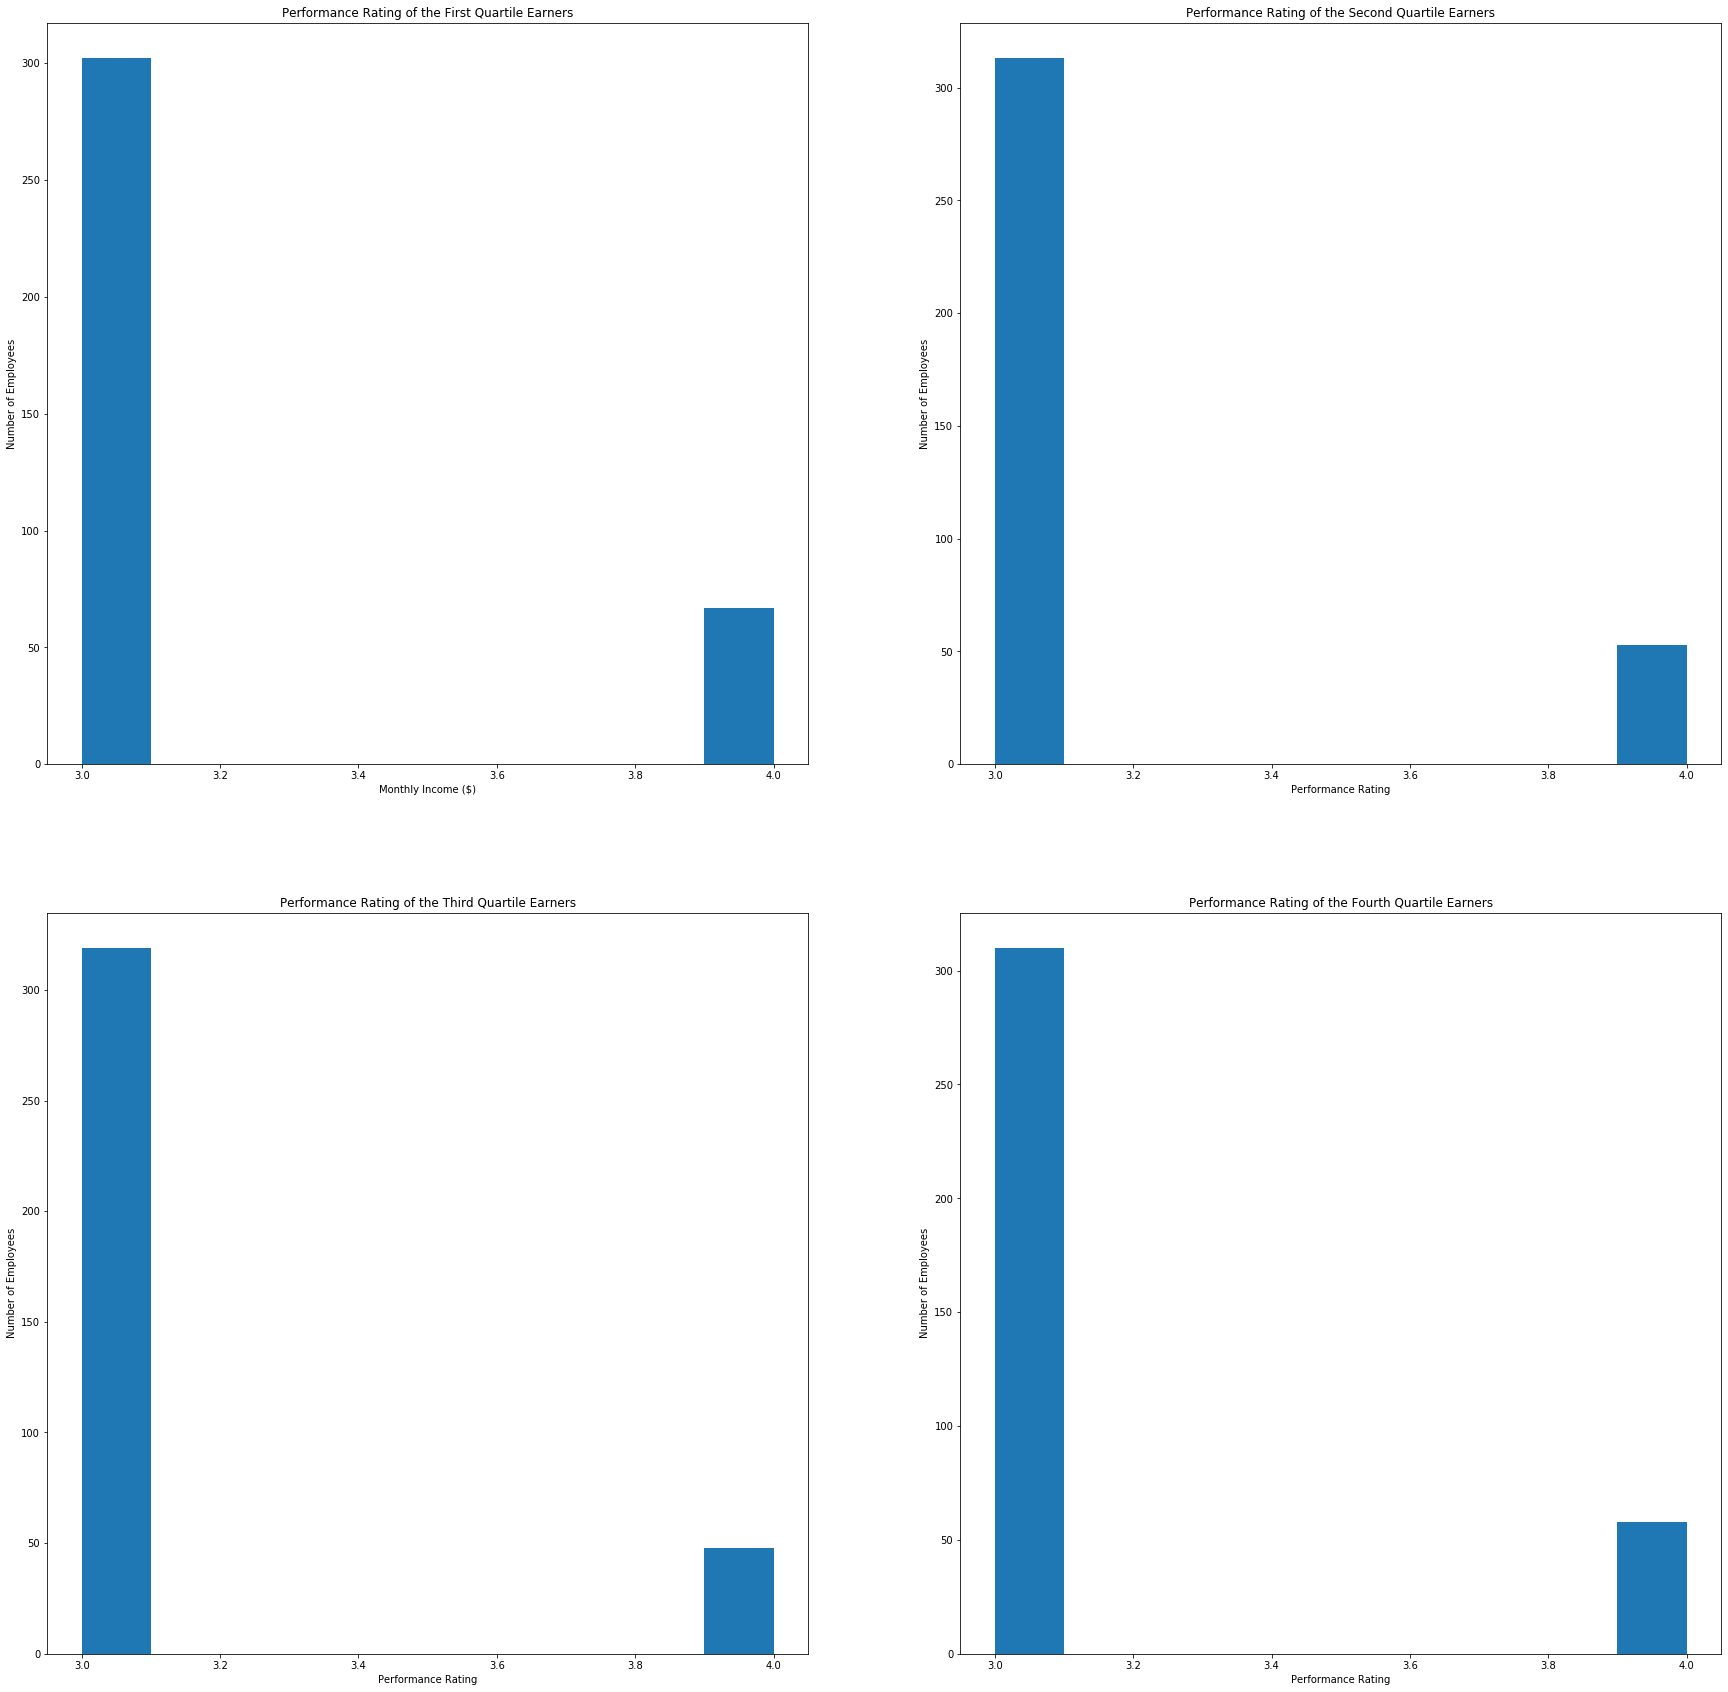

In [163]:
df = pd.read_csv('IBM.csv')
Bottom = df.loc[lambda df: df['MonthlyIncome'] <= 2911.0, : ]
Bottom = Bottom['PerformanceRating']
Lower = df.loc[lambda df: df['MonthlyIncome'] > 2911.0, : ]
Lower = Lower.loc[lambda Lower: Lower['MonthlyIncome'] <= 4919.0, : ]
Lower = Lower['PerformanceRating']
Upper = df.loc[lambda df: df['MonthlyIncome'] > 4919.0, : ]
Upper = Upper.loc[lambda Upper: Upper['MonthlyIncome'] <= 8379.0, : ]
Upper = Upper['PerformanceRating']
Top = df.loc[lambda df: df['MonthlyIncome'] > 8379.0, : ]
Top = Top.loc[lambda Top: Top['MonthlyIncome'] < 20000, : ]
Top = Top['PerformanceRating']

plt.figure(figsize=(30, 30))
plt.subplot(2, 2, 1)
plt.hist(Bottom)
plt.title('Performance Rating of the First Quartile Earners')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Number of Employees')

plt.subplot(2, 2, 2)
plt.hist(Lower)
plt.title('Performance Rating of the Second Quartile Earners')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')

plt.subplot(2, 2, 3)
plt.hist(Upper)
plt.title('Performance Rating of the Third Quartile Earners')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')

plt.subplot(2, 2, 4)
plt.hist(Top)
plt.title('Performance Rating of the Fourth Quartile Earners')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')

All four of these graphs are virtually identical. Therefore, it is evident that income does not effect performance. This corroborates the findings of social psychologists, who's research has found intrinsic motiviation to be much stronger than extrinsic motivation.  

Further Research:
From this data set, it is possible to extrapolate a gender wage gap. To accurately compute this, one would have to analyze a combination of educational level, total working years, years at company, and performance rating. Furthermore, it'd be important to ensure the results are not confounded by the job role.